In [45]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import ndimage
from sklearn import preprocessing
from skimage import feature
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [95]:
import tensorflow as tf

In [187]:
def parse_sounds(path):
    S, features, labels = [], np.empty((0,729)), np.empty(0)
    for filename in os.listdir(path):
        if filename.startswith(""):
            X, sample_rate = librosa.load(path+filename) 
                        
            spectr = librosa.feature.melspectrogram(X, sr=sample_rate)
            spectr = preprocess_image(spectr)
            
            S.append(spectr)  
            
            hog = extract_image_features(spectr)
            
            ext_features = np.hstack([hog])
#             print(len(ext_features))
            features = np.vstack([features,ext_features])  
            
            label = filename.split(".")[0].split("_")[1]
            labels = np.append(labels, label)
            
    return S, np.array(features), np.array(labels, dtype = np.int)

def preprocess_image(image):
    image = preprocessing.normalize(image, norm="l2")
    image = ndimage.gaussian_filter(image, sigma=2)
    image = resize(image, (40, 40))
    return image

def extract_image_features(image):
    hog = skimage.feature.hog(image)
    return hog

In [188]:
path = "C:/Neat/Study/диплом/data/ready/"

S, X, y = parse_sounds(path)

c:\users\sodipole\python35\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\sodipole\python35\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Mel-scaled рower spectrograms for "один" (processed)


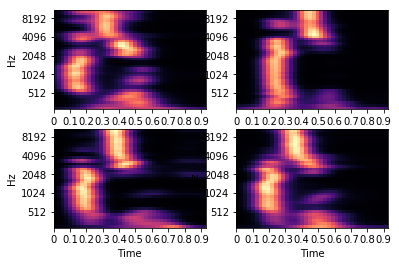

In [226]:
print('Mel-scaled рower spectrograms for "один" (processed)')
plt.subplot(2, 2, 1)
librosa.display.specshow(S[0], y_axis='mel', x_axis='time')

plt.subplot(2, 2, 2)
librosa.display.specshow(S[50], y_axis='mel', x_axis='time')

plt.subplot(2, 2, 3)
librosa.display.specshow(S[350], y_axis='mel', x_axis='time')

plt.subplot(2, 2, 4)
librosa.display.specshow(S[700], y_axis='mel', x_axis='time')

plt.show()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=100, 
                                                    random_state=42, 
                                                    stratify=y)

In [191]:
c = RandomForestClassifier(random_state=42, 
                           n_estimators=100)

print("cross-val score", cross_val_score(c, X, y).mean())

cross-val score 0.702222222222


In [192]:
clf = RandomForestClassifier(random_state=42, 
                             n_estimators=50)

clf.fit(X_train, y_train)

results = clf.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, results))

for label, result in sorted(zip(y_test, results), key=lambda x: x[0]):
    if label == result:
        print(label, "\t", result, "\t", "+")
    else:
        print(label, "\t", result)

accuracy 0.74
1 	 1 	 +
1 	 9
2 	 2 	 +
2 	 16
3 	 31
3 	 3 	 +
4 	 4 	 +
4 	 4 	 +
5 	 5 	 +
5 	 5 	 +
6 	 6 	 +
6 	 6 	 +
7 	 7 	 +
7 	 7 	 +
8 	 8 	 +
8 	 8 	 +
9 	 31
9 	 9 	 +
10 	 10 	 +
10 	 10 	 +
11 	 11 	 +
11 	 8
12 	 12 	 +
12 	 15
13 	 12
13 	 13 	 +
14 	 14 	 +
14 	 14 	 +
15 	 15 	 +
15 	 15 	 +
16 	 17
16 	 16 	 +
17 	 14
17 	 17 	 +
18 	 19
18 	 18 	 +
19 	 19 	 +
19 	 13
20 	 20 	 +
20 	 20 	 +
21 	 21 	 +
21 	 23
22 	 22 	 +
22 	 1
23 	 23 	 +
23 	 8
24 	 24 	 +
24 	 24 	 +
25 	 25 	 +
25 	 25 	 +
26 	 26 	 +
26 	 26 	 +
27 	 27 	 +
27 	 27 	 +
28 	 28 	 +
28 	 23
29 	 29 	 +
29 	 21
30 	 30 	 +
30 	 30 	 +
31 	 31 	 +
31 	 2
32 	 32 	 +
32 	 32 	 +
33 	 39
33 	 31
34 	 34 	 +
34 	 34 	 +
35 	 9
35 	 22
36 	 36 	 +
36 	 36 	 +
37 	 37 	 +
37 	 37 	 +
38 	 38 	 +
38 	 38 	 +
39 	 39 	 +
39 	 39 	 +
40 	 40 	 +
40 	 40 	 +
41 	 41 	 +
41 	 41 	 +
42 	 42 	 +
42 	 42 	 +
43 	 43 	 +
43 	 4
44 	 46
44 	 44 	 +
45 	 45 	 +
45 	 45 	 +
46 	 46 	 +
46 	 46 	 +
47 	 27
47 	 

In [193]:
c = svm.SVC(kernel="linear")

print("cross-val score", cross_val_score(c, X, y).mean())

cross-val score 0.602222222222


In [216]:
clf = svm.SVC(kernel="linear", random_state=42)

clf.fit(X_train, y_train)

results = clf.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, results))

for label, result in sorted(zip(y_test, results), key=lambda x: x[0]):
    if label == result:
        print(label, "\t", result, "\t", "+")
    else:
        print(label, "\t", result)

accuracy 0.59
1 	 1 	 +
1 	 47
2 	 2 	 +
2 	 12
3 	 6
3 	 3 	 +
4 	 4 	 +
4 	 4 	 +
5 	 20
5 	 5 	 +
6 	 6 	 +
6 	 6 	 +
7 	 7 	 +
7 	 7 	 +
8 	 8 	 +
8 	 47
9 	 31
9 	 9 	 +
10 	 10 	 +
10 	 47
11 	 13
11 	 30
12 	 12 	 +
12 	 15
13 	 12
13 	 13 	 +
14 	 14 	 +
14 	 14 	 +
15 	 15 	 +
15 	 19
16 	 19
16 	 16 	 +
17 	 9
17 	 18
18 	 17
18 	 17
19 	 19 	 +
19 	 19 	 +
20 	 5
20 	 20 	 +
21 	 21 	 +
21 	 23
22 	 32
22 	 1
23 	 23 	 +
23 	 47
24 	 24 	 +
24 	 24 	 +
25 	 39
25 	 23
26 	 26 	 +
26 	 24
27 	 27 	 +
27 	 27 	 +
28 	 28 	 +
28 	 23
29 	 27
29 	 4
30 	 30 	 +
30 	 20
31 	 31 	 +
31 	 2
32 	 39
32 	 32 	 +
33 	 33 	 +
33 	 33 	 +
34 	 34 	 +
34 	 34 	 +
35 	 45
35 	 22
36 	 36 	 +
36 	 26
37 	 37 	 +
37 	 37 	 +
38 	 38 	 +
38 	 38 	 +
39 	 39 	 +
39 	 39 	 +
40 	 40 	 +
40 	 40 	 +
41 	 41 	 +
41 	 41 	 +
42 	 40
42 	 40
43 	 49
43 	 43 	 +
44 	 49
44 	 49
45 	 49
45 	 45 	 +
46 	 44
46 	 46 	 +
47 	 47 	 +
47 	 47 	 +
48 	 48 	 +
48 	 48 	 +
49 	 49 	 +
49 	 49 	 +
50 	 50 	 

In [100]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels-1] = 1
    return one_hot_encode

Y_train = one_hot_encode(y_train)
Y_test = one_hot_encode(y_test)

In [121]:
training_epochs = 10000
n_dim = X_train.shape[1]
n_classes = 50
n_hidden_units_one = 300
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.00001

In [122]:
X_ = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X_,W_1) + b_1)

W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], 
                                   mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)

W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [123]:
cost_function = -tf.reduce_sum(Y * tf.log(y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

--- 1158.7775340080261 seconds ---
Test accuracy:  0.05


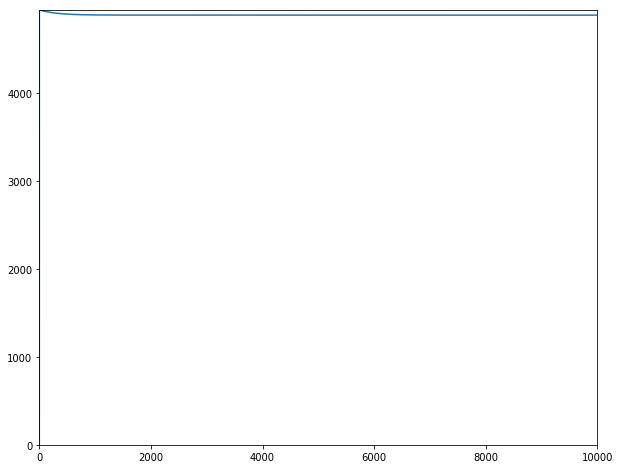

F-Score: 0.05


In [124]:
start_time = time.time()

cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):   
        if epoch % 100 == 0:
            print(epoch, "epochs", end='\r')
        _,cost = sess.run([optimizer,cost_function],feed_dict={X_:X_train,Y:Y_train})
        cost_history = np.append(cost_history,cost)
    
    end_time = time.time()
    print("--- %s seconds ---" % (end_time - start_time))
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X_: X_test})
    y_true = sess.run(tf.argmax(Y_test,1))
    print("Test accuracy: ",round(sess.run(accuracy, 
                                              feed_dict={X_: X_test,Y: Y_test}),3))
    
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = metrics.precision_recall_fscore_support(y_true, y_pred, average="micro")
print("F-Score:", round(f,3))